In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

In [2]:
park_data = pd.read_csv('liver.csv', encoding="ISO-8859-1")

## Analyzing the Dataset

In [3]:
park_data.head()

,age,gender,total_bilirubin,direct_bilirubin,alkphos_alkaline_phosphotase,sgpt_alamine_aminotransferase,sgot_aspartate_aminotransferase,total_proteins,albumin,albumin_and_globulin_ratio,result
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0


In [4]:
park_data.shape

(30691, 11)

In [5]:
park_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              30689 non-null  float64
 1   gender                           29789 non-null  float64
 2   total_bilirubin                  30043 non-null  float64
 3   direct_bilirubin                 30130 non-null  float64
 4    alkphos_alkaline_phosphotase    29895 non-null  float64
 5    sgpt_alamine_aminotransferase   30153 non-null  float64
 6   sgot_aspartate_aminotransferase  30229 non-null  float64
 7   total_proteins                   30228 non-null  float64
 8   albumin                          30197 non-null  float64
 9   albumin_and_globulin_ratio       30132 non-null  float64
 10  result                           30691 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 2.6 MB


In [6]:
park_data.isnull().sum()

age                                  2
gender                             902
total_bilirubin                    648
direct_bilirubin                   561
 alkphos_alkaline_phosphotase      796
 sgpt_alamine_aminotransferase     538
sgot_aspartate_aminotransferase    462
total_proteins                     463
albumin                            494
albumin_and_globulin_ratio         559
result                               0
dtype: int64

In [7]:
park_data.dropna(inplace=True)
park_data.reset_index(inplace=True)

In [8]:
park_data.isnull().sum()

index                              0
age                                0
gender                             0
total_bilirubin                    0
direct_bilirubin                   0
 alkphos_alkaline_phosphotase      0
 sgpt_alamine_aminotransferase     0
sgot_aspartate_aminotransferase    0
total_proteins                     0
albumin                            0
albumin_and_globulin_ratio         0
result                             0
dtype: int64

In [9]:
park_data.describe()

,index,age,gender,total_bilirubin,direct_bilirubin,alkphos_alkaline_phosphotase,sgpt_alamine_aminotransferase,sgot_aspartate_aminotransferase,total_proteins,albumin,albumin_and_globulin_ratio,result
count,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000,27158.000000
mean,15424.753811,44.125046,0.737683,3.407909,1.541630,290.142021,81.279292,112.102879,6.472605,3.124044,0.943567,0.282790
std,8806.802670,15.971563,0.439902,6.332486,2.895084,239.595473,181.571537,283.616005,1.081477,0.792329,0.324205,0.450363
min,0.000000,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,7911.250000,33.000000,0.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,0.000000
50%,15226.500000,45.000000,1.000000,1.000000,0.300000,209.000000,36.000000,42.000000,6.600000,3.100000,0.900000,0.000000
75%,23052.750000,55.000000,1.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.700000,1.100000,1.000000
max,30690.000000,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


Check for number of people having parkinsons and number of people who don't. The status column gives the data of people with and without Parkinson's Disease. The status **1** represents person has the disease and the stauts **0** represents that the person doesn't

In [10]:
park_data['result'].value_counts()

0    19478
1     7680
Name: result, dtype: int64

<AxesSubplot:title={'center':'Liver Disease Analyzer'}, xlabel='result', ylabel='count'>

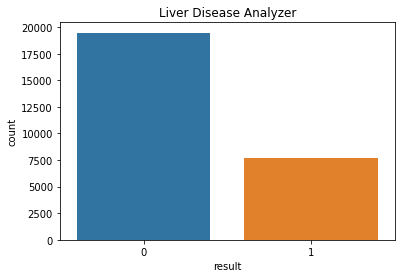

In [11]:
plt.title("Liver Disease Analyzer")
sns.countplot(x='result', data=park_data)

#### Correlation Heatmap

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column. The color of the cell is proportional to the number of measurements that match the dimensional value. This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data. A correlation heatmap, like a regular heatmap, is assisted by a colorbar making data easily readable and comprehensible.

<AxesSubplot:>

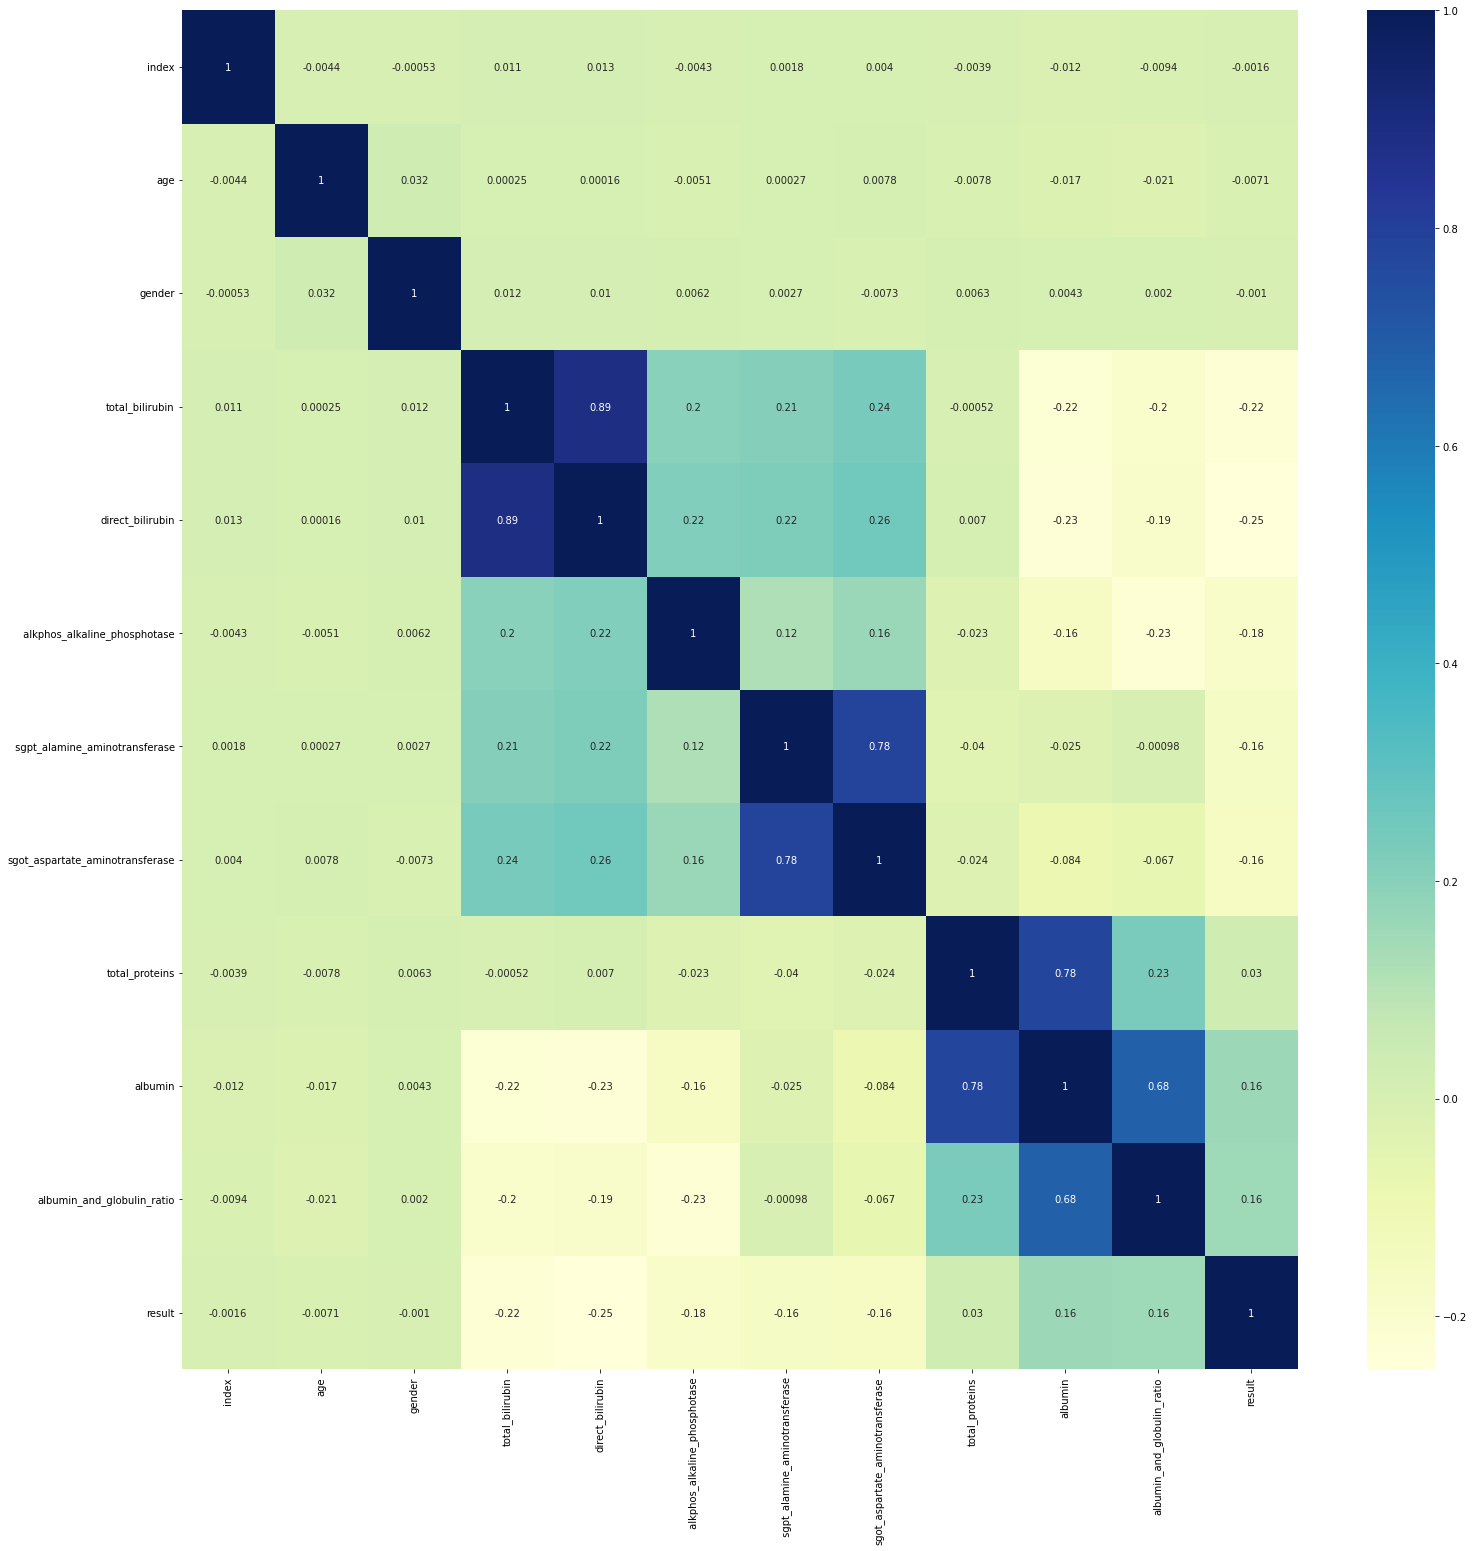

In [12]:
plt.figure(figsize = (25, 25))
sns.heatmap(park_data.corr(), annot=True, cmap='YlGnBu')

Now, we group the data by the status and find the mean of all the attributes for better understanding

In [13]:
park_data.groupby(['result']).mean()

,index,age,gender,total_bilirubin,direct_bilirubin,alkphos_alkaline_phosphotase,sgpt_alamine_aminotransferase,sgot_aspartate_aminotransferase,total_proteins,albumin,albumin_and_globulin_ratio
result,,,,,,,,,,,
0,15433.517456,44.195913,0.737961,4.301325,1.993839,317.61608,99.997998,140.101859,6.452084,3.045970,0.911990
1,15402.527474,43.945312,0.736979,1.142031,0.394740,220.46237,33.804948,41.091927,6.524648,3.322057,1.023651


## Preprocessing

Separating the target (status) from rest of the features

In [14]:
x = park_data.drop(columns=['result'])
y = park_data['result']

In [15]:
x.drop(columns="index", inplace=True)

In [16]:
y

0        0
1        0
2        0
3        0
4        0
        ..
27153    0
27154    0
27155    0
27156    0
27157    0
Name: result, Length: 27158, dtype: int64

Split the original full data into training data into testing data. Here, test size represents the percentage of data we want for testing. For example, test_size = 0.2 means that 20% of the data goes into testing and 80% goes to training. <br><br>
The random_state attribute is used to reproduce the same result from earlier. The train_test_split randomly splits the data into training part and testing part. Now, if we do random_state = 1, then everytime we or anyone performs train_test_split on our code by keeping random_state as 1 will get same data for the training and testing data. Same goes with any other integer with random_state value. If random_state = 2, then values that we get might be diffrent from the values we got for random_state = 1, but everytime we will perform train_test_split by using random_state = 2, we will get same value.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [18]:
print(x.shape, x_train.shape, x_test.shape) # second + third = first

(27158, 10) (21726, 10) (5432, 10)


## Data Standardization
We need to standardize the data before moving forward. Our table has 22 features (after removing _name_ and _status_ columns). Now, we should standardize them to a range, without making them lose their meaning. The process of doing this is called **data standardization**. This is done by using the **StandardScaler()** that we imported above. It uses normal distribution (z = (x - μ) / σ)

In [19]:
scaler = StandardScaler()

In [20]:
# Fitting the data to be standardized into scaler, since we cannot randomly standardize

# scaler.fit(x_train)
# x_train = scaler.transform(x_train)

x_train = scaler.fit_transform(x_train)

# We don't fit the data into x_test since we want to test the data and if we put then model will get trained on test
# data as well
x_test = scaler.transform(x_test)

In [21]:
x_train # All values are in the range of -1 to 1.

array([[ 1.75166568, -1.67797359, -0.3914691 , ..., -0.43379073,
         0.9836953 ,  2.7916052 ],
       [-1.95249658, -1.67797359, -0.25030267, ...,  1.41499153,
         1.10991942,  0.17571964],
       [ 0.7471471 , -1.67797359,  2.08678596, ...,  0.39816129,
         0.4787988 ,  0.23726989],
       ...,
       [-0.63406594,  0.59595694,  1.17704676, ..., -0.06403427,
        -1.03589071, -1.36303657],
       [ 1.06105916,  0.59595694,  6.18061236, ...,  0.95279597,
        -0.65721833, -1.36303657],
       [ 1.24940639,  0.59595694, -0.40715426, ...,  0.4906004 ,
        -0.15232183, -0.74753408]])

## Model Training (Using Random forest Model)

In [22]:
model = RandomForestClassifier(max_depth=14, random_state=2) # SVC = Support Vector Classifier  Also has SVR (R for regressor)
# The list of kernels is ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ (Default is rbf (radial basis function))

In [23]:
# Training the SVM Model with training data
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=14, random_state=2)

## Model Evaluation

In [24]:
# Find accuracy score on training data
y_pred_train = model.predict(x_train)
training_acc = accuracy_score(y_train, y_pred_train)

In [25]:
training_acc # Accuracy score above 0.75 (75%) is considered to be a good accuracy score (Too much is bad - overfitting)

0.9999079443984167

In [26]:
y_pred_test = model.predict(x_test)
test_acc = accuracy_score(y_test, y_pred_test)

In [27]:
test_acc # Accuracy score close to training accuracy shows that model is good. Else, it might be sign of overfitting

0.9996318114874816

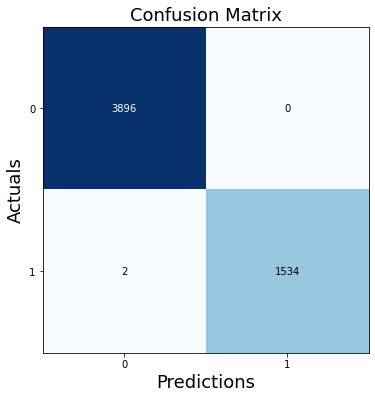

In [28]:
cm = confusion_matrix(y_test, y_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [29]:
import joblib
filename = "liver.sav"
joblib.dump(model, filename)

['liver.sav']

In [30]:
input_data = (65, 0, 0.7, 0.1, 187, 16, 18, 6.8, 3.3, 0.9)
# input_data = (198.76400,396.96100,74.90400,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.24100,0.01265,0.01321,0.01588,0.03794,0.07223,19.02000,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306)

# Converting into numpy array
inp_arr = np.asarray(input_data) # np.asarray() is same as np.array(), except that np.asarray() doesn't make a copy unless necessary

# Reshape the numpy array. This is necessary because if we don't reshape the array, the model will think that there are
# multiple rows (equal to shape of x_train). So, we need to tell the model that we have only one row.
inp_reshape = inp_arr.reshape(1, -1)

# Standardize the data
standard_inp = scaler.transform(inp_reshape)

# Let the model predict
predicted = model.predict(standard_inp)

# print(predicted, predicted2)

if predicted[0] == 0:
    print("You are healthy!")
elif predicted[0] == 1:
    print("You re suffering from Liver Disease")

You are healthy!
